<a href="https://colab.research.google.com/github/ErikaDenisse29/ColabFiles/blob/main/PracticaRegresionLinealSimple_256027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Apellidos y Nombre: Montanez Valdivia Erika Denisse
*   Matrícula: 256027

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

In [1]:
# Escribe tu código aquí
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

df = pd.read_csv('drive/MyDrive/restaurantes.csv')
print(df.head())
print()
print(df.describe())


Mounted at /content/drive
   poblation   profit
0     6.1101  17.5920
1     5.5277   9.1302
2     8.5186  13.6620
3     7.0032  11.8540
4     5.8598   6.8233

       poblation     profit
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?**

*Al ver la grafica parece que si siguen una tendencia lineal, y que acumulan mas datos de un lado que de otro*

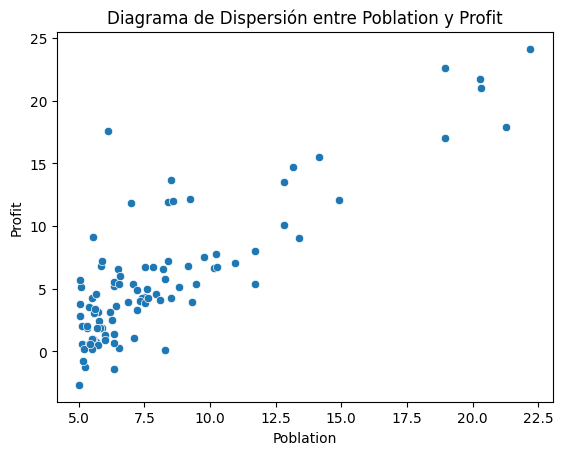

In [2]:
# Diagrama de dispersión
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='poblation', y='profit')

plt.title('Diagrama de Dispersión entre Poblation y Profit')
plt.xlabel('Poblation')
plt.ylabel('Profit')
plt.show()


### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación?

*El resultado fue de .83 lo que es cercano a 1 por lo que si indica una relación fuerte.*
- ¿Es positiva o negativa?

*Es positiva.*
- ¿Es coherente con el gráfico anterior?

*Si porque se alinean a una direccion ascendente.*

In [3]:
# Cálculo de correlación
correlation = df['poblation'].corr(df['profit'])
print(f'Coeficiente de correlación de Pearson: {correlation}')

Coeficiente de correlación de Pearson: 0.837873232526341


## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?

*El resultado fue negativo, por lo que no deberia a ver beneficio en un contexto practico*

4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?

*El resultado fue positivo, significa un aumento de beneficio, si la población  crece*

In [4]:
# Construcción del modelo  y Coeficientes del modelo
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['poblation']]
y = df['profit']


model = LinearRegression()
model.fit(X, y)


intercepto = model.intercept_
coeficiente = model.coef_[0]


print(f'Intercepto: {intercepto}')
print(f'Coeficiente de regresión (pendiente): {coeficiente}')

Intercepto: -3.8957808783118484
Coeficiente de regresión (pendiente): 1.1930336441895932


### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


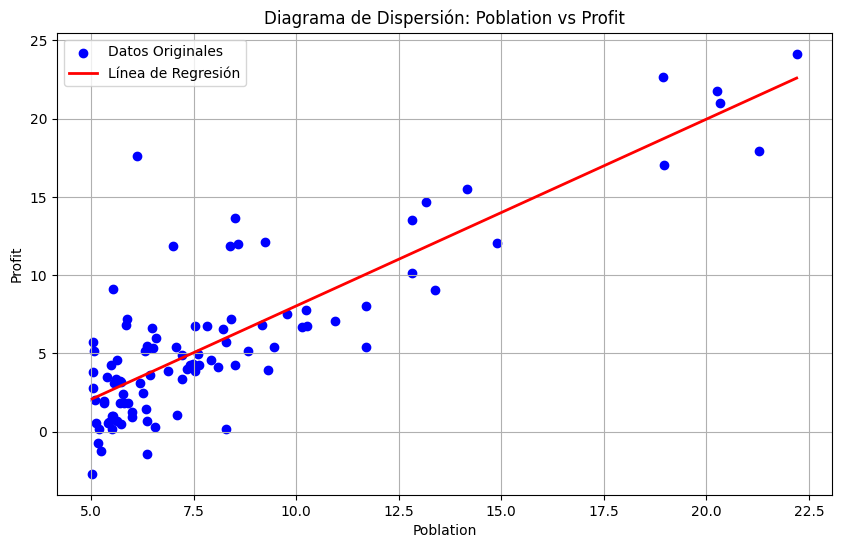

In [5]:
# Visualización del modelo ajustado
plt.figure(figsize=(10, 6))


plt.scatter(df['poblation'], df['profit'], color='blue', label='Datos Originales')


x_values = np.linspace(df['poblation'].min(), df['poblation'].max(), 100)
y_values = model.predict(x_values.reshape(-1, 1))

plt.plot(x_values, y_values, color='red', label='Línea de Regresión', linewidth=2)

plt.title('Diagrama de Dispersión: Poblation vs Profit')
plt.xlabel('Poblation')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()

## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal?


*Al ver la grafica si parece una distribucion normal*

0     14.198226
1      6.431249
2      7.394804
3      7.394728
4      3.728142
        ...    
92     4.094738
93    -0.446840
94    -5.853984
95    -3.028612
96    -1.973574
Name: profit, Length: 97, dtype: float64


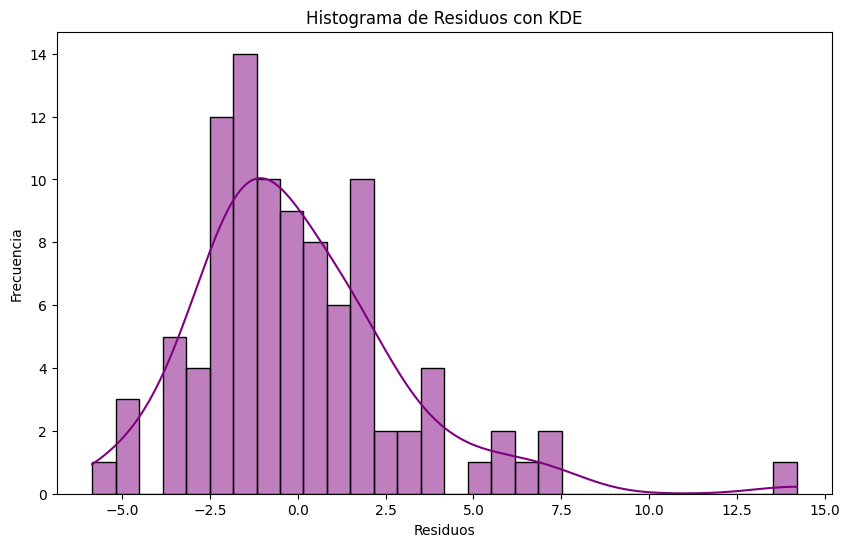

In [6]:
# Normalidad de los residuos
predicciones = model.predict(X)

residuos = y - predicciones
print(residuos)

plt.figure(figsize=(10, 6))

sns.histplot(residuos, kde=True, color='purple', bins=30)


plt.title('Histograma de Residuos con KDE')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()


### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?

*La mayoria de los datos si muestran un patron siguiendo la linea roja*

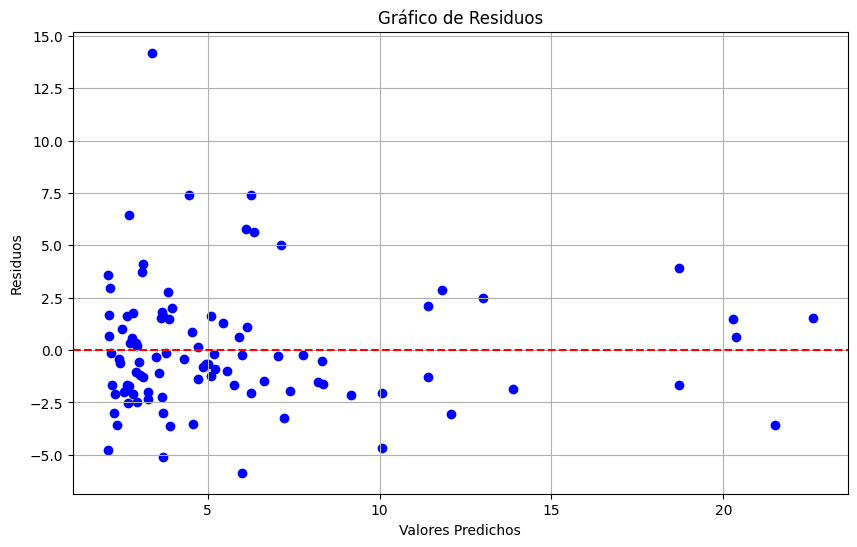

In [7]:
# Gráfico de residuos vs predichos
predicciones = model.predict(X)


residuos = y - predicciones

plt.figure(figsize=(10, 6))
plt.scatter(predicciones, residuos, color='blue')
plt.axhline(0, color='red', linestyle='--')


plt.title('Gráfico de Residuos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid()
plt.show()

### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal y b) Desviaciones sistemáticas indican asimetría o colas pesadas.

*La respuesta correcta es a)*

<Figure size 1000x600 with 0 Axes>

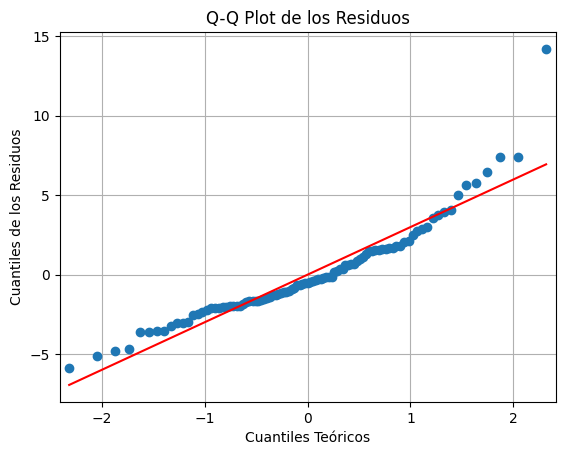

In [8]:
# Q-Q Plot
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

X = df[['poblation']]
y = df['profit']


model = LinearRegression()
model.fit(X, y)


predicciones = model.predict(X)
residuos = y - predicciones

plt.figure(figsize=(10, 6))
sm.qqplot(residuos, line='s')
plt.title('Q-Q Plot de los Residuos')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de los Residuos')
plt.grid()
plt.show()

## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?

In [9]:
# Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


X = df[['poblation']]
y = df['profit']

model = LinearRegression()
model.fit(X, y)

predicciones = model.predict(X)

mse = mean_squared_error(y, predicciones)
rmse = np.sqrt(mse)

r2 = r2_score(y, predicciones)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')


MSE: 8.953942751950358
RMSE: 2.9923139460876023
R²: 0.7020315537841397


## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¿Qué tan útil consideras el modelo?

*El modelo es util, pero dio un resultado negativo que en sentido practico podria no ser suficiente para algunos casos de la vida real.*

- ¿Qué limitaciones encuentras?

*Necesita que las variables sean lineales, que en muchos casos no es asi.
Los outliers influirian en los resultados.*

- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.

Se puede estandarizar las variables para que su desviacion estandar sea 1 y asi mejorar el rendimiento.
Tambien ayuda que las variables tengan una media de cero.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['poblation', 'profit']] = scaler.fit_transform(df[['poblation', 'profit']])